In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc
from sklearn import metrics

from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# read the dataset
data = pd.read_csv("clean_hotel_bookings.csv", index_col='Unnamed: 0')

/Users/moniquekong/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 58 columns):
hotel                                    119390 non-null int64
is_canceled                              119390 non-null int64
is_repeated_guest                        119390 non-null int64
reserved_room_type                       119390 non-null object
assigned_room_type                       119390 non-null object
country_is_FRA                           119390 non-null int64
country_is_DEU                           119390 non-null int64
country_is_other                         119390 non-null int64
reserved_assigned_room_type_match        119390 non-null int64
fall                                     119390 non-null int64
spring                                   119390 non-null int64
summer                                   119390 non-null int64
winter                                   119390 non-null int64
distribution_channel_Corporate           119390 non-null int64
distr

In [4]:
data['is_canceled'].value_counts(1)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [5]:
data['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

Noted that if we use majority-class method, the accuracy will be about 0.63. Therefore, the implemented method should be better than this. 

In [6]:
features = ['hotel',
            'is_repeated_guest',
#             'reserved_room_type',
#             'assigned_room_type',
            'reserved_assigned_room_type_match',
            'country_is_FRA',
            'country_is_DEU',
            'country_is_other',
            'spring',
            'summer',
            'fall',
            'winter',
            'distribution_channel_Corporate',
            'distribution_channel_Direct',
            'distribution_channel_GDS',
            'distribution_channel_TA/TO',
            'distribution_channel_Undefined',
            'market_segment_Aviation',
            'market_segment_Complementary',
            'market_segment_Corporate',
            'market_segment_Direct',
            'market_segment_Groups',
            'market_segment_Offline TA/TO',
            'market_segment_Online TA',
            'market_segment_Undefined',
            'meal_BB',
            'meal_FB',
            'meal_HB',
            'meal_SC',
            'meal_Undefined',
            'deposit_type_No Deposit',
            'deposit_type_Non Refund',
            'customer_type_Contract',
            'customer_type_Group',
            'customer_type_Transient',
            'customer_type_Transient-Party',
            'agent_14',
            'agent_7',
            'agent_is_other',
            'log_lead_minmax',
#             'cut_previous_cancellations',
#             'cut_previous_bookings_not_canceled',
#             'cut_booking_changes',
            "previous_cancellations_minmax",
            "previous_bookings_not_canceled_minmax",
            "booking_changes_minmax",
            'stays_in_weekend_nights_minmax',
            'stays_in_week_nights_minmax',
            'stays_in_total_nights_minmax',
            'adults_minmax',
            'children_minmax',
            'babies_minmax',
            'days_in_waiting_list_minmax',
            'adr_minmax',
            'required_car_parking_spaces_minmax',
            'total_of_special_requests_minmax'
           ]

label = ['is_canceled']

In [7]:
len(features)

51

In [8]:
X = data[features]
y = data[label]

In [9]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
model.get_depth()

49

In [11]:
model.get_n_leaves()

17542

In [12]:
np.random.seed(0)
model = DecisionTreeClassifier()
score_cv = cross_val_score(model, X, y, cv=10)

In [13]:
score_cv.mean()

0.6292386506489074

In [14]:
# features selection - keep only the top 30 features
rfe = RFE(model,30)
rfe = rfe.fit(X, y.values.ravel())

print(rfe.ranking_)

[ 1 11  1  5  1  1  1  1  1  1  9 13 19  1 21 18 16  7  1  2  4  1 22  1
  8  1  1  6 15  1 10 20  1  1 14 17  1  1  1  1  1  1  1  1  1  1 12  3
  1  1  1]


In [15]:
features_selected = []
for feature, is_selected in zip(features,rfe.support_):
    if is_selected:
        features_selected.append(feature)
print(len(features_selected),"\n",features_selected)

30 
 ['hotel', 'reserved_assigned_room_type_match', 'country_is_DEU', 'country_is_other', 'spring', 'summer', 'fall', 'winter', 'distribution_channel_TA/TO', 'market_segment_Direct', 'market_segment_Online TA', 'meal_BB', 'meal_HB', 'meal_SC', 'deposit_type_Non Refund', 'customer_type_Transient', 'customer_type_Transient-Party', 'agent_is_other', 'log_lead_minmax', 'previous_cancellations_minmax', 'previous_bookings_not_canceled_minmax', 'booking_changes_minmax', 'stays_in_weekend_nights_minmax', 'stays_in_week_nights_minmax', 'stays_in_total_nights_minmax', 'adults_minmax', 'children_minmax', 'adr_minmax', 'required_car_parking_spaces_minmax', 'total_of_special_requests_minmax']


In [16]:
X_new = data[features_selected]

model = DecisionTreeClassifier()
score_cv = cross_val_score(model, X_new, y, cv=10)
print(score_cv.mean())

0.6310813468238203


In [17]:
model.fit(X_new,y)
print(model.get_n_leaves(),'\t',model.get_depth())

17695 	 49


In [18]:
# to try different hyper-parameters
depths = np.arange(10,51,20)
max_features = np.arange(1,31,10)
num_leafs = [5000,10000,15000,17000]


try_grid = [{'max_depth': depths, 
             'max_features': max_features,
             'max_leaf_nodes':num_leafs}]

np.random.seed(0)
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X_new,y)
print(DTM.best_params_)
print(DTM.best_score_)

{'max_depth': 10, 'max_features': 11, 'max_leaf_nodes': 10000}
0.7934332858698383


In [19]:
# Fine-tuning: narrow down the range of parameters
depths = [5,10,15,20]
max_features = np.arange(5,17,3)
num_leafs = [9000,10000,11000]


try_grid = [{'max_depth': depths, 
             'max_features': max_features,
             'max_leaf_nodes':num_leafs}]
np.random.seed(0)
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X_new,y)
print(DTM.best_params_)
print(DTM.best_score_)

{'max_depth': 10, 'max_features': 14, 'max_leaf_nodes': 10000}
0.7899237792109892


In [20]:
depths = np.arange(7,11)
max_features = np.arange(11,15)
num_leafs = [9900,10000,10100]

try_grid = [{'max_depth': depths, 
             'max_features': max_features,
             'max_leaf_nodes':num_leafs}]

np.random.seed(0)
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X_new,y)
print(DTM.best_params_)
print(DTM.best_score_)

{'max_depth': 9, 'max_features': 13, 'max_leaf_nodes': 9900}
0.7993550548622163


In [21]:
score_cv = cross_val_score(DTM.best_estimator_, X_new, y, cv=10);score_cv

array([0.75762144, 0.74698492, 0.74715243, 0.80703518, 0.85166262,
       0.80542759, 0.80867817, 0.8405093 , 0.76570615, 0.80800804])

In [22]:
y_pred = cross_val_predict(DTM.best_estimator_, X_new, y, cv=10);y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [23]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 89219, 1: 30171}

In [24]:
print("Confusion Matrix:", "\n"+str(confusion_matrix(y,y_pred))+"\n")
print("Accuracy Score:", "\n"+str(accuracy_score(y,y_pred,normalize=True, sample_weight=None))+"\n")
print(classification_report(y,y_pred))

Confusion Matrix: 
[[68496  6670]
 [20723 23501]]

Accuracy Score: 
0.7705586732557166

              precision    recall  f1-score   support

           0       0.77      0.91      0.83     75166
           1       0.78      0.53      0.63     44224

    accuracy                           0.77    119390
   macro avg       0.77      0.72      0.73    119390
weighted avg       0.77      0.77      0.76    119390



Text(0.5, 0, 'False Positive Rate')

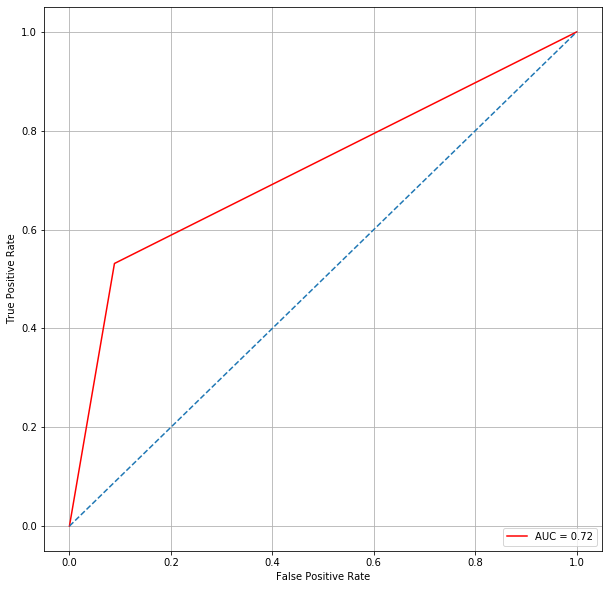

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y,y_pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [26]:
metrics.auc(fpr, tpr)

0.7213356780817164